In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-17,135.460007,136.089996,133.529999,133.979996,133.979996,48354100,AMAZON
2023-08-18,131.619995,134.070007,131.149994,133.220001,133.220001,48469400,AMAZON
2023-08-21,133.740005,135.190002,132.710007,134.679993,134.679993,41442500,AMAZON
2023-08-22,135.080002,135.649994,133.729996,134.250000,134.250000,32935100,AMAZON
2023-08-23,134.500000,135.949997,133.220001,135.520004,135.520004,42801000,AMAZON
2023-08-24,136.399994,136.779999,131.830002,131.839996,131.839996,43646300,AMAZON
2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44124800,AMAZON
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34083100,AMAZON
2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38361300,AMAZON


In [3]:
color_pal=sns.color_palette()
color_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

/tmp/ipykernel_20/1060887869.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


<Figure size 1500x1200 with 0 Axes>

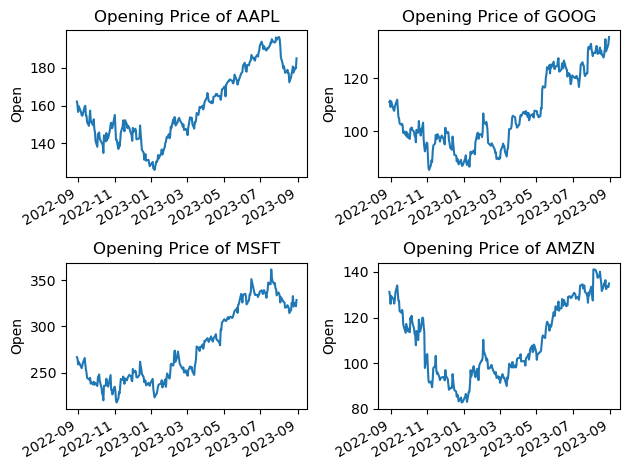

In [4]:
plt.figure(figsize=(15, 12))
plt.subplots()

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Open'].plot()
    plt.ylabel('Open')
    plt.xlabel(None)
    plt.title(f"Opening Price of {tech_list[i - 1]}")
    
plt.tight_layout()

/tmp/ipykernel_20/4014114630.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


<Figure size 1500x1200 with 0 Axes>

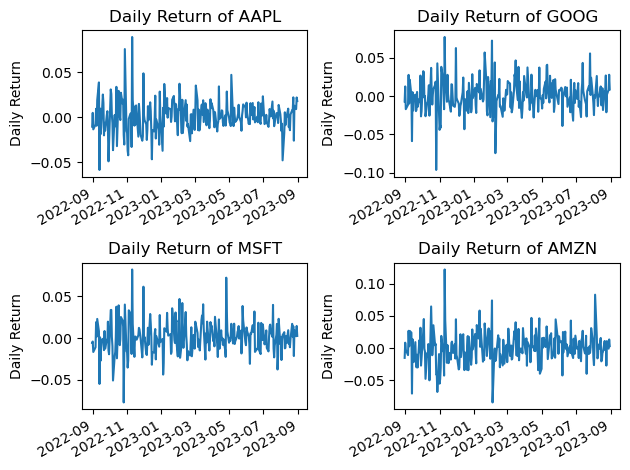

In [5]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(15, 12))
plt.subplots()

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].plot()
    plt.ylabel('Daily Return')
    plt.xlabel(None)
    plt.title(f"Daily Return of {tech_list[i - 1]}")
    
plt.tight_layout()

/tmp/ipykernel_20/1086156345.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


<Figure size 1500x1200 with 0 Axes>

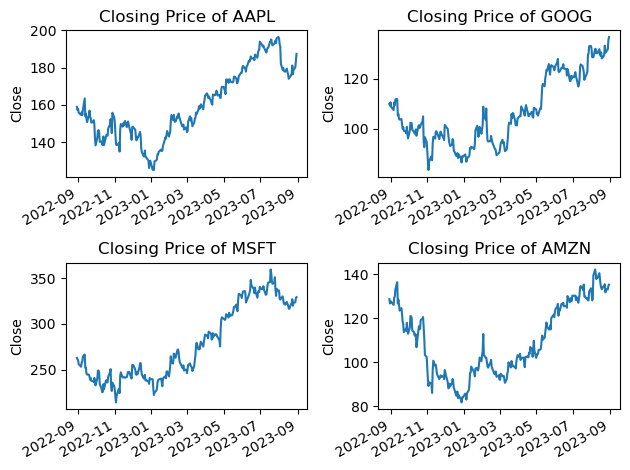

In [6]:
plt.figure(figsize=(15, 12))
plt.subplots()

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [7]:
##This is an example:
##df['Open:30 days rolling']=df['Open'].rolling(window=10, min_periods=1).mean()

<Figure size 1500x1200 with 0 Axes>

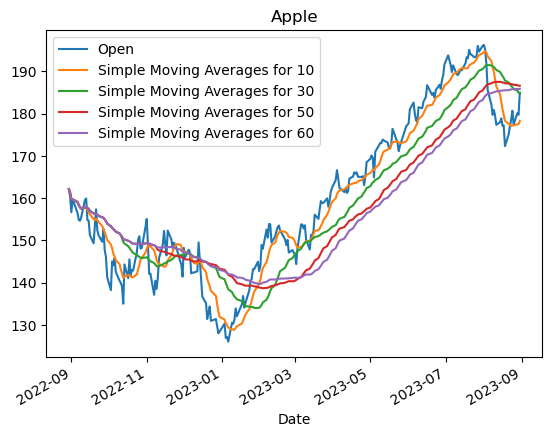

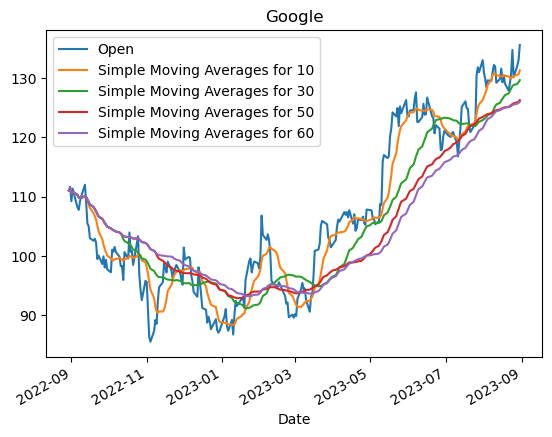

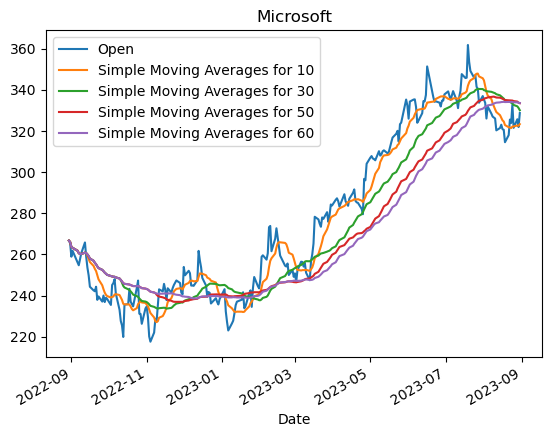

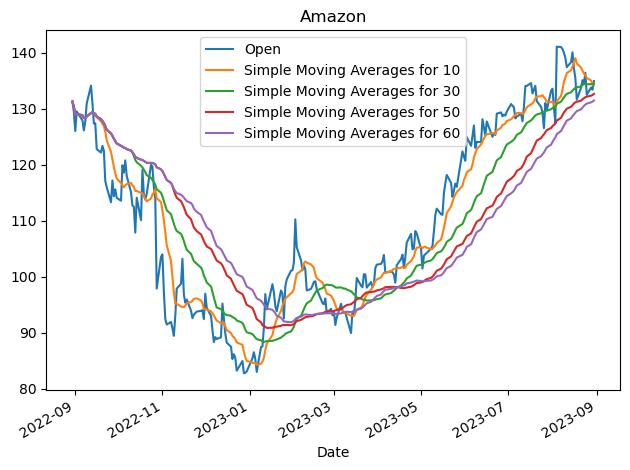

In [8]:
window=[10,30,50,60]

for ma_avg in window:
    for company in company_list:
        column=f"Simple Moving Averages for {ma_avg}"
        company[column]=company['Open'].rolling(ma_avg, min_periods=1).mean() #we need to use an aggregate function so here we are using average
        
plt.figure(figsize=(15, 12))

AAPL[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Apple')

GOOG[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Google')

MSFT[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Microsoft')

AMZN[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Amazon')

plt.tight_layout()

<Figure size 1500x1200 with 0 Axes>

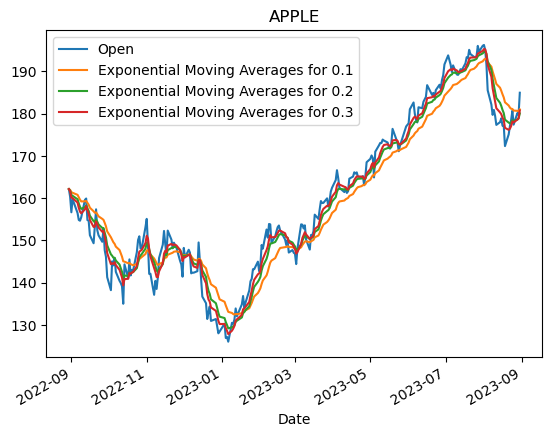

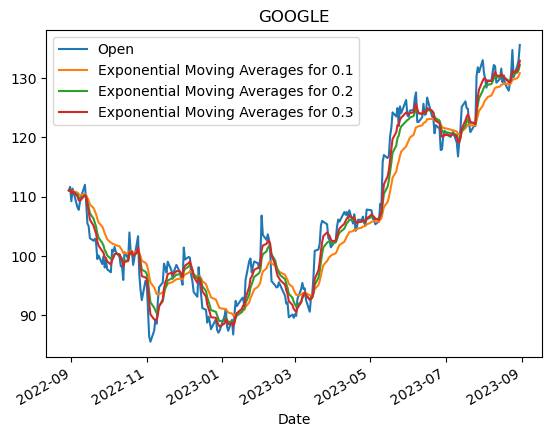

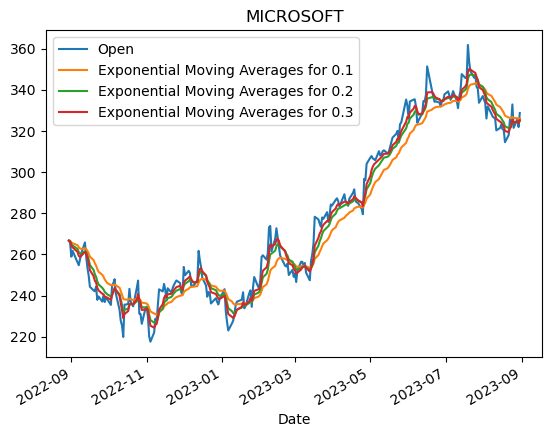

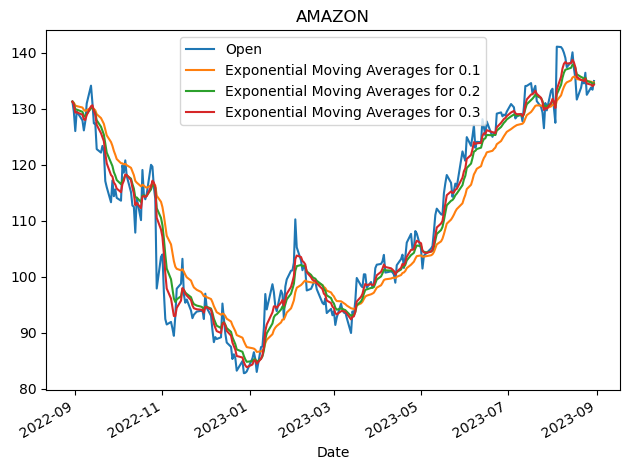

In [9]:
sf=[0.1,0.2,0.3]

for s_factor in sf:
    for company in company_list:
        column=f"Exponential Moving Averages for {s_factor}"
        company[column]=company['Open'].ewm(alpha=s_factor, adjust=False).mean() #we need to use an aggregate function so here we are using average
        
plt.figure(figsize=(15, 12))

AAPL[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('APPLE')

GOOG[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('GOOGLE')

MSFT[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('MICROSOFT')

AMZN[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('AMAZON')

plt.tight_layout()

In [10]:
data = df.filter(['Close'])
#The values property returns all values in the DataFrame. 
#The return value is a 2-dimensional array with one array for each row.
new_df=data.values

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(new_df)
scaled=scaler.fit_transform(new_df)

In [12]:
length=len(scaled)

In [13]:
days = 50

X_train = []
y_train = []


for i in range(days, length):  
    #to add the previous values to X_train of the prediction days 
    X_train.append(scaled[i - days:i, 0])
    #adding current values to y train of the prediction day 
    y_train.append(scaled[i, 0])

# Convert the x_train and y_train lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [15]:
model=Sequential()
#Relu activation function is mainly used in the hidden layers which consists of 100 neurons
model.add(LSTM(100,
               activation='relu', 
               input_shape=(X_train.shape[1], 1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 43,351
Trainable params: 43,351
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, batch_size=5, epochs=50)

Epoch 1/50
192/192 [==============================] - 7s 25ms/step - loss: 0.0093
Epoch 2/50
192/192 [==============================] - 5s 25ms/step - loss: 0.0025
Epoch 3/50
192/192 [==============================] - 5s 25ms/step - loss: 0.0020
Epoch 4/50
192/192 [==============================] - 5s 26ms/step - loss: 0.0019
Epoch 5/50
192/192 [==============================] - 5s 25ms/step - loss: 0.0018
Epoch 6/50
192/192 [==============================] - 5s 25ms/step - loss: 0.0017
Epoch 7/50
192/192 [==============================] - 5s 25ms/step - loss: 0.0018
Epoch 8/50
192/192 [==============================] - 5s 24ms/step - loss: 0.0015
Epoch 9/50
192/192 [==============================] - 5s 24ms/step - loss: 0.0015
Epoch 10/50
192/192 [==============================] - 5s 26ms/step - loss: 0.0016
Epoch 11/50
192/192 [==============================] - 5s 25ms/step - loss: 0.0016
Epoch 12/50
192/192 [==============================] - 5s 25ms/step - loss: 0.0014
Epoch 13/50
1

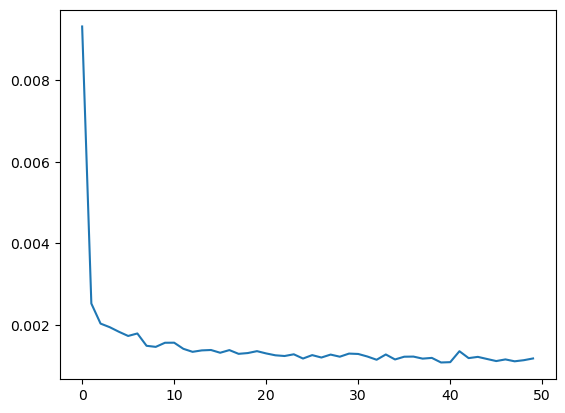

In [18]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
#Losses significantly decreased